In [2]:
from eolearn.core import EOTask, EOPatch, LinearWorkflow, FeatureType, OverwritePermission, \
    LoadTask, SaveTask, EOExecutor, ExtractBandsTask, MergeFeatureTask
from eolearn.io.processing_api import SentinelHubInputTask
from eolearn.core import LoadTask, SaveToDisk, AddFeature, RemoveFeature
from eolearn.visualization import EOPatchVisualization
from shapely.ops import cascaded_union

from eolearn.mask import AddValidDataMaskTask

from eolearn.features import SimpleFilterTask, NormalizedDifferenceIndexTask
from eolearn.geometry import VectorToRaster
import geopandas as gpd
import os
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import sentinelhub as sh
from sentinelhub import UtmZoneSplitter, BBox, CRS, DataCollection

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\holoviews\operation\datashader.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Callable


In [2]:
config = sh.SHConfig()
config.sh_client_id= r'9bd0a46d-3d5b-4dc0-98b5-546b3635f9f3'
config.sh_client_secret = r'~)x%O:RiSc|F5i+SIL}^fZUlWOa.;E^{_:&!J6@:'
config.save()

In [3]:
path = r'C:\Users\FEEL\geospatial_datasets\LUCAS_2018_Copernicus\LUCAS_2018_Copernicus'


In [232]:
gdf = gpd.read_file(os.path.join(path,"LUCAS_2018_Copernicus_polygons.shp"))
csv = pd.read_csv(os.path.join(path,"LUCAS_2018_Copernicus_attributes.csv"))

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DriverError: C:\Users\FEEL\geospatial_datasets\LUCAS_2018_Copernicus\LUCAS_2018_Copernicus\LUCAS_2018_Copernicus_polygons.shp: No such file or directory

In [ ]:
pt = gpd.read_file(os.path.join(r'F:\geospatial_datasets\portugal_shapefile',r'PRT_adm1.shp'))

<AxesSubplot:>

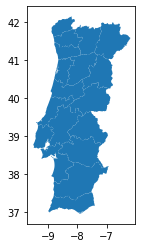

In [231]:
pt[pt.TYPE_1 == "Distrito"].plot()

In [254]:
portugal_bounds = gpd.GeoSeries(cascaded_union(pt[pt.TYPE_1 == "Distrito"].geometry.to_list()))

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [269]:
bbox_splitter = sh.BBoxSplitter(portugal_bounds.geometry.to_list(),sh.CRS.WGS84,(400,800))

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyboardInterrupt: 

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

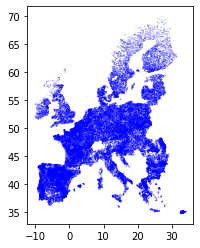

In [6]:
gdf.plot(edgecolor='b',facecolor='b')

In [5]:
portugal_csv = csv.loc[csv["NUTS0"] == "PT"]
gdf.POINT_ID = gdf.POINT_ID.astype(int)
portugal_gdf = portugal_csv.merge(gdf, on='POINT_ID', how='inner')
portugal_gdf.crs = gdf.crs
portugal_gdf = gpd.GeoDataFrame(portugal_gdf)


C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

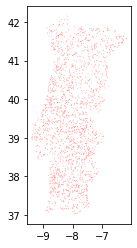

In [177]:
portugal_gdf.plot(edgecolor='red')

# Testing the intersect-ability of geopandas

In [7]:
    from shapely.geometry import Polygon
poly = Polygon([(-8.9,40.20),(-8.9,41.18),(-8.70,40.18),(-8.70,40.20)])
poly1 = gpd.GeoSeries(poly)
df1 = gpd.GeoDataFrame({'geometry':poly1})
df1.crs = gdf.crs
#df1["geom_type"] = gdf.geom_type[1]
#df1["is_valid"] = gdf.is_valid[1]
#poly = gpd.GeoDataFrame(poly, crs = portugal_gdf.crs)

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

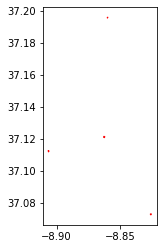

In [8]:
gpd.GeoDataFrame(portugal_gdf[:4]).plot(edgecolor='r')

In [9]:
gpd.overlay(portugal_gdf,df1, how='intersection')

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID,POINT_ID,YEAR,NUTS0,NUTS1,NUTS2,NUTS3,TH_LAT,TH_LONG,OFFICE_PI,...,TH_GPS_DIST,FILE_PATH_GISCO_NORTH,FILE_PATH_GISCO_SOUTH,FILE_PATH_GISCO_EAST,FILE_PATH_GISCO_WEST,FILE_PATH_GISCO_POINT,CPRN_LC_SAME_LC1,LUCAS_CORE_INTERSECT,COPERNICUS_CLEANED,geometry
0,49760,27282102,2018,PT,PT1,PT16,PT16E,40.219562,-8.838408,0,...,2.604797,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.83856 40.22003, -8.83784 40.21969..."
1,53343,27302100,2018,PT,PT1,PT16,PT16E,40.206548,-8.810257,0,...,1.179481,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.81030 40.20664, -8.81010 40.20658..."
2,144871,27302106,2018,PT,PT1,PT16,PT16E,40.258972,-8.826112,0,...,3.168190,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.82621 40.25943, -8.82549 40.25909..."
3,436258,27322112,2018,PT,PT1,PT16,PT16E,40.315853,-8.819101,0,...,2.480821,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.81921 40.31631, -8.81849 40.31597..."
4,132863,27362108,2018,PT,PT1,PT16,PT16E,40.289812,-8.762726,0,...,2.023495,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.76286 40.29028, -8.76214 40.28994..."
5,113011,27362116,2018,PT,PT1,PT16,PT16E,40.359714,-8.783869,0,...,0.483155,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.78400 40.36016, -8.78328 40.35982..."
6,116664,27382100,2018,PT,PT1,PT16,PT16E,40.224337,-8.718773,0,...,2.037186,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.71884 40.22449, -8.71867 40.22434..."
7,113071,27382118,2018,PT,PT1,PT16,PT16E,40.381639,-8.766237,0,...,2.520618,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.76635 40.38210, -8.76598 40.38169..."
8,92498,27382124,2018,PT,PT1,PT16,PT16E,40.434060,-8.782131,0,...,1.922115,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,True,True,True,"POLYGON ((-8.78225 40.43450, -8.78153 40.43416..."
9,34347,27402128,2018,PT,PT1,PT16,PT16E,40.473457,-8.769788,0,...,2.050898,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.eu/lucas/phot...,https://gisco-services.ec.europa.e

In [197]:
portugal_gdf[portugal_gdf.intersects(df1.geometry[0])].plot(edgecolor='b')
#portugal_gdf = portugal_gdf.buffer(500)

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'df1' is not defined

In [171]:
bbox_splitter = sh.BBoxSplitter(portugal_gdf.geometry.to_list(),sh.CRS.WGS84,200)

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [172]:
geometry = [Polygon(bbox.get_polygon()) for bbox in bbox_splitter.get_bbox_list()]
bbox_portugal_gdf = gpd.GeoDataFrame(geometry=geometry,crs = sh.CRS.WGS84)

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'Polygon' is not defined

In [ ]:
bbox_portugal_gdf.plot()

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(-9.541600896202329, -6.045920250528354, 36.765603271579515, 42.40883611930318)

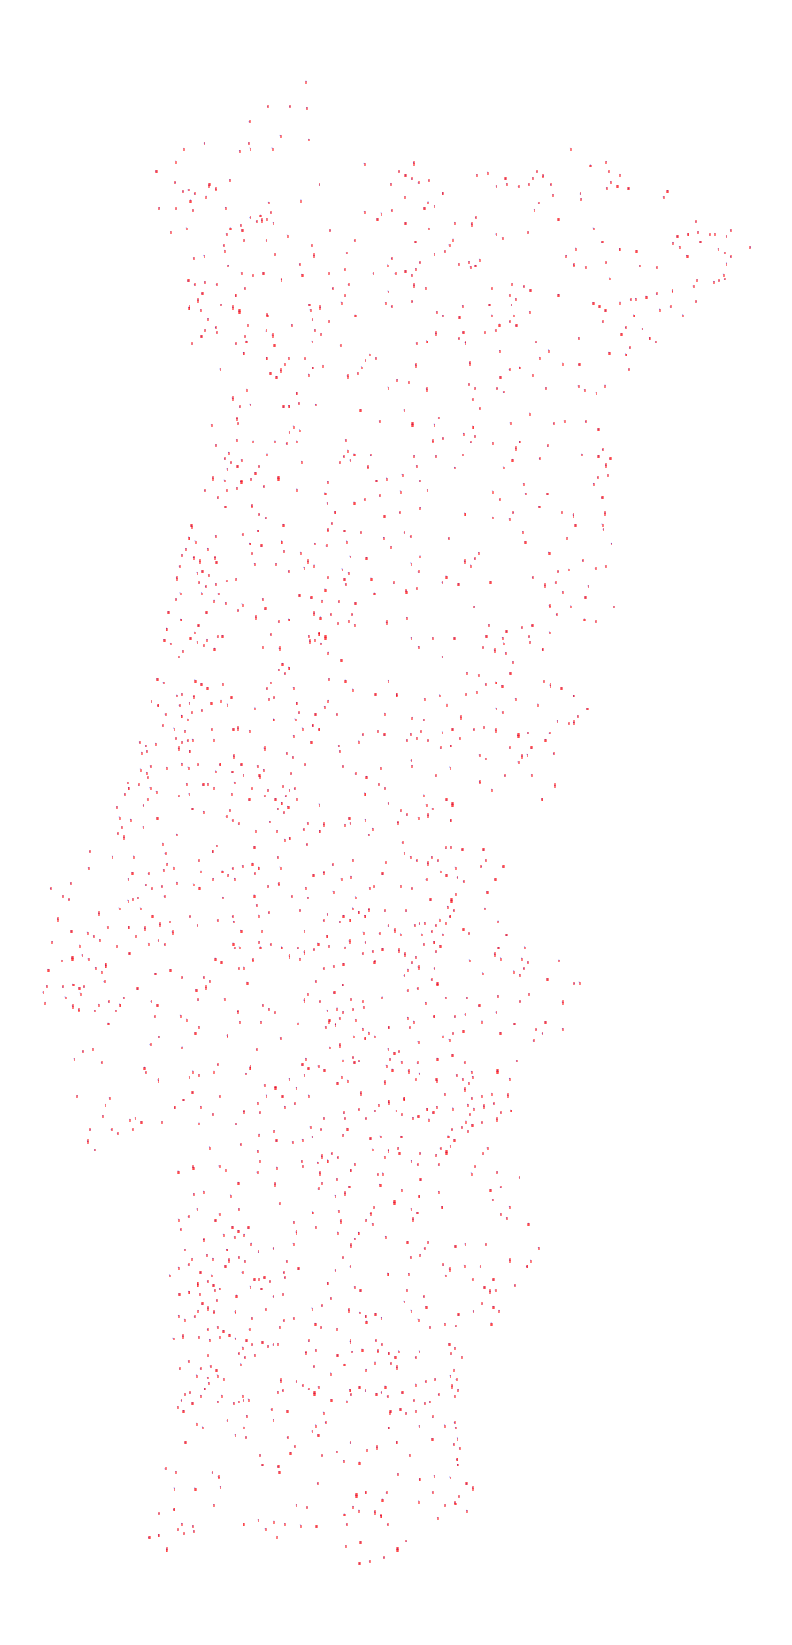

In [19]:
fig, ax = plt.subplots(figsize=(30, 30))
bbox_portugal_gdf.plot(ax=ax,facecolor='w',edgecolor='r',alpha=0.5)
portugal_gdf.plot(ax=ax, facecolor='None',edgecolor='b',alpha=0.5)
plt.axis('off')

# Cont

In [7]:
band_names = ['B02', 'B03', 'B04', 'B08', 'B11', 'B12']
add_data = SentinelHubInputTask(
    bands_feature=(FeatureType.DATA, 'BANDS'),
    bands = band_names,
    resolution=10,
    maxcc=0.8,
    time_difference=datetime.timedelta(minutes=120),
    data_collection=DataCollection.SENTINEL2_L1C,
    max_threads=5,
    config=config,
)
path_out = r'F:\geospatial_datasets\eopatches'
if not os.path.isdir(path_out):
    os.makedirs(path_out)
save = SaveTask(path_out, overwrite_permission=OverwritePermission.OVERWRITE_PATCH)

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
add_lucas = AddFeature((FeatureType.META_INFO,"LUCAS_DATA"))

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
workflow = LinearWorkflow(add_data,add_lucas,save)

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [201]:
# Execute the workflow
time_interval = ['2019-01-01', '2019-01-21'] # time interval for the SH request

# define additional parameters of the workflow
execution_args = []
for idx, bbox in enumerate(bbox_splitter.get_bbox_list()[:1]):

    execution_args.append({
        add_data:{'bbox': bbox, 'time_interval': time_interval},
        add_lucas:{'data': portugal_gdf[portugal_gdf.intersects(bbox.geometry)]},
        save: {'eopatch_folder': f'eopatch_{idx}'}
    })
executor = EOExecutor(workflow, execution_args, save_logs=True)
executor.run(workers=5, multiprocess=False)

executor.make_report()

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)


In [103]:
#add_data.execute(bbox=bbox, time_interval=time_interval)

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


EOPatch(
  data: {
    BANDS: numpy.ndarray(shape=(7, 71, 35, 6), dtype=float32)
  }
  mask: {}
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {
    maxcc: 0.8
    service_type: 'processing'
    size_x: 35
    size_y: 71
    time_difference: datetime.timedelta(seconds=7200)
    time_interval: ('2019-01-01T00:00:00', '2019-01-20T23:59:59')
  }
  bbox: BBox(((-9.374761592658798, 38.95876876467212), (-9.370789228288714, 38.96518152927181)), crs=CRS('4326'))
  timestamp: [datetime.datetime(2019, 1, 3, 11, 40, 30), ..., datetime.datetime(2019, 1, 20, 11, 30, 32)], length=7
)

In [ ]:
workflow.execute(input_args={add_data:(bbox,)})

In [142]:
patch = EOPatch.load(r'F:\geospatial_datasets\eopatches\eopatch_0',lazy_loading=False)

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [182]:
ground_truth=patch.mask_timeless["GROUND_TRUTH"]

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


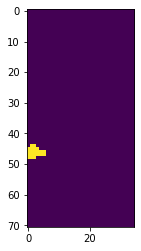

In [185]:
plt.imshow(np.squeeze(ground_truth))

## plotting with mask over ground truth    

In [97]:
patch.plot((FeatureType.DATA, 'BANDS')) * patch.plot((FeatureType.MASK_TIMELESS, 'GROUND_TRUTH'))

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: EPSG code does not define a projection

In [72]:
class FilterVectorToRaster(EOTask):
    
    def __init__(self,dataset,raster_feature,values_column,raster_resolution):
        #this cant be here still, must add the args to the class and call vector2rastertask in the executemethod
        self.dataset = dataset
        self.featureType = raster_feature
        self.values_column = values_column
        self.raster_resolution = raster_resolution
        
    def execute(self,eopatch):
        vector = self.dataset[self.dataset.geometry.intersects(eopatch.bbox.geometry)]
        print(type(vector))
        self.vector2rastertask = VectorToRaster(vector,raster_feature=self.featureType,values=self.values_column,raster_resolution=self.raster_resolution)
        return self.vector2rastertask.execute(eopatch)

In [134]:
patch.plot(FeatureType.DATA)

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: Ellipsis

In [80]:
load_eopatch = LoadTask(path_out) # in order to add lucas i'd have to wrap the addFeature with a eotask that would get the bbox of the given eopatch; add the intersected points to the metadata as previosuly done
add_lucas_raster =  FilterVectorToRaster(portugal_gdf,raster_feature=(FeatureType.MASK_TIMELESS,"GROUND_TRUTH"),values=1,raster_resolution=10)
addfeatureWorkflow = LinearWorkflow(load_eopatch,add_lucas_raster,save)
 

In [81]:
addfeatureWorkflow.execute({load_eopatch:{"eopatch_folder":"eopatch_0"}, save:{'eopatch_folder': f'eopatch_0'}})

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the correct order of coordinates.
  warnings.warn(message, category=SHUserWarning)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\sentinelhub\constants.py:97: SHUserWarning: sentinelhub-py supports only WGS 84 coordinate reference system with coordinate order lng-lat. Given pyproj.CRS(4326) has coordinate order lat-lng. Be careful to use the corr

<class 'geopandas.geodataframe.GeoDataFrame'>


WorkflowResults(
  Dependency(SaveTask):
    EOPatch(
      data: {
        BANDS: numpy.ndarray(shape=(7, 71, 35, 6), dtype=float32)
      }
      mask: {}
      scalar: {}
      label: {}
      vector: {}
      data_timeless: {}
      mask_timeless: {
        GROUND_TRUTH: numpy.ndarray(shape=(71, 35, 1), dtype=uint8)
      }
      scalar_timeless: {}
      label_timeless: {}
      vector_timeless: {}
      meta_info: {
        LUCAS_DATA: geopandas.GeoDataFrame(columns=['ID', 'POINT_ID', 'YEAR', 'NUTS0', 'NUTS1', 'NUTS2', 'NUTS3', 'TH_LAT', 'TH_LONG', 'OFFICE_PI', 'EX_ANTE', 'SURVEY_DATE', 'CAR_LATITUDE', 'CAR_EW', 'CAR_LONGITUDE', 'GPS_PROJ', 'GPS_PREC', 'GPS_ALTITUDE', 'GPS_LAT', 'GPS_EW', 'GPS_LONG', 'OBS_DIST', 'OBS_DIRECT', 'OBS_TYPE', 'OBS_RADIUS', 'LETTER_GROUP', 'LC1', 'LC1_LABEL', 'LC1_SPEC', 'LC1_SPEC_LABEL', 'LC1_PERC', 'LC2', 'LC2_LABEL', 'LC2_SPEC', 'LC2_SPEC_LABEL', 'LC2_PERC', 'LU1', 'LU1_LABEL', 'LU1_TYPE', 'LU1_TYPE_LABEL', 'LU1_PERC', 'LU2', 'LU2_LABEL', 'LU2_TYPE'

In [275]:
for i in os.listdir(path_out)
    eopatch_name = os.path.join(path_out,i)
    eopatch =

SyntaxError: invalid syntax (<ipython-input-275-7715f5312fb2>, line 1)

In [ ]:
patch.plot((FeatureType.MASK_TIMELESS, 'GROUND_TRUTH')) * patch.plot((FeatureType.DATA,'BANDS'))

In [ ]:
fig, axs = plt.subplots(nrows=700, ncols=50, figsize=(20, 20))

for i, inp in enumerate(bbox_splitter.get_bbox_list()[:50]):
    eopatch = EOPatch.load(f'{path_out}/eopatch_{i}', lazy_loading=True)
    ax = axs[i//700][i%50]
    dates = np.array(eopatch.timestamp)
    ax.imshow(np.clip(eopatch.data['BANDS'][0][..., [2, 1, 0]] * 3.5, 0, 1))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("auto")
    del eopatch

fig.subplots_adjust(wspace=0, hspace=0)

(-0.5, 33.5, 70.5, -0.5)

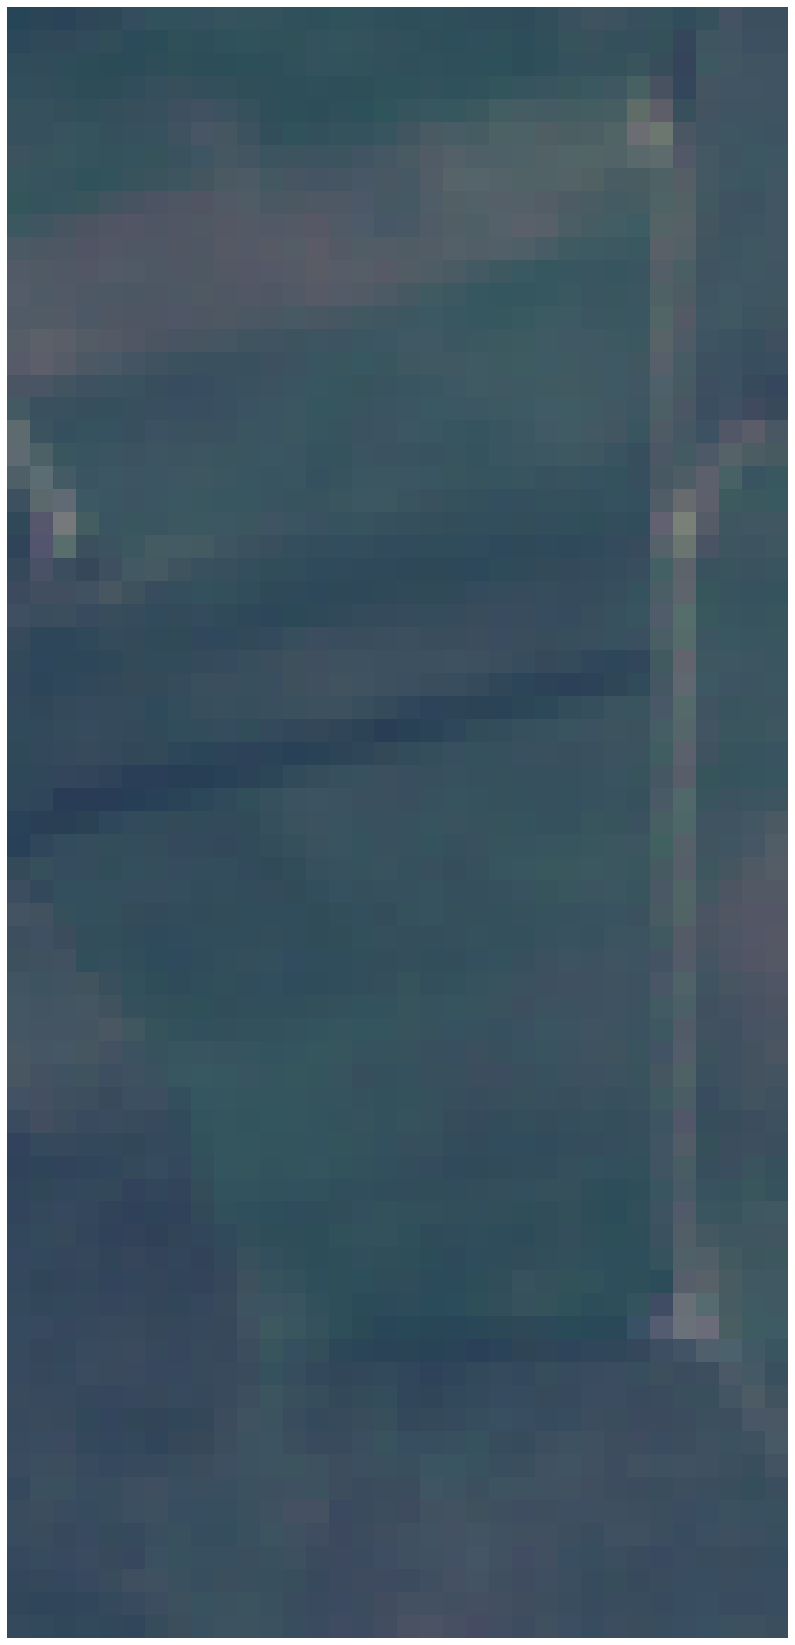

In [70]:
fig, ax = plt.subplots(figsize=(30, 30))
bbox_portugal_gdf.plot(ax=ax,facecolor='w',edgecolor='r',alpha=0.5)
portugal_gdf.plot(ax=ax, facecolor='None',edgecolor='b',alpha=0.5)
for i, inp in enumerate(bbox_splitter.get_bbox_list()[:50]):
    eopatch = EOPatch.load(f'{path_out}/eopatch_{i}', lazy_loading=True)
    ax.imshow(np.clip(eopatch.data['BANDS'][0][..., [2, 1, 0]] * 3.5, 0, 1))
    del eopatch
plt.axis('off')

Add the dataframe with the info of the ground truth

Add the mask to which the info is applied to

Check the result obtained

Change the WGS TO sentinelhub.CRS.WGS84 

Figure out how to get the  bboxes that contain data from portugal_gdf

In [ ]:
portugal_bounds = gpd.GeoSeries(cascaded_union(pt[pt.TYPE_1 == "Distrito"].geometry.to_list())).plot()

In [285]:
bbox_splitter = sh.BBoxSplitter(portugal_bounds.geometry.to_list(),sh.CRS.WGS84,(200,300))

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


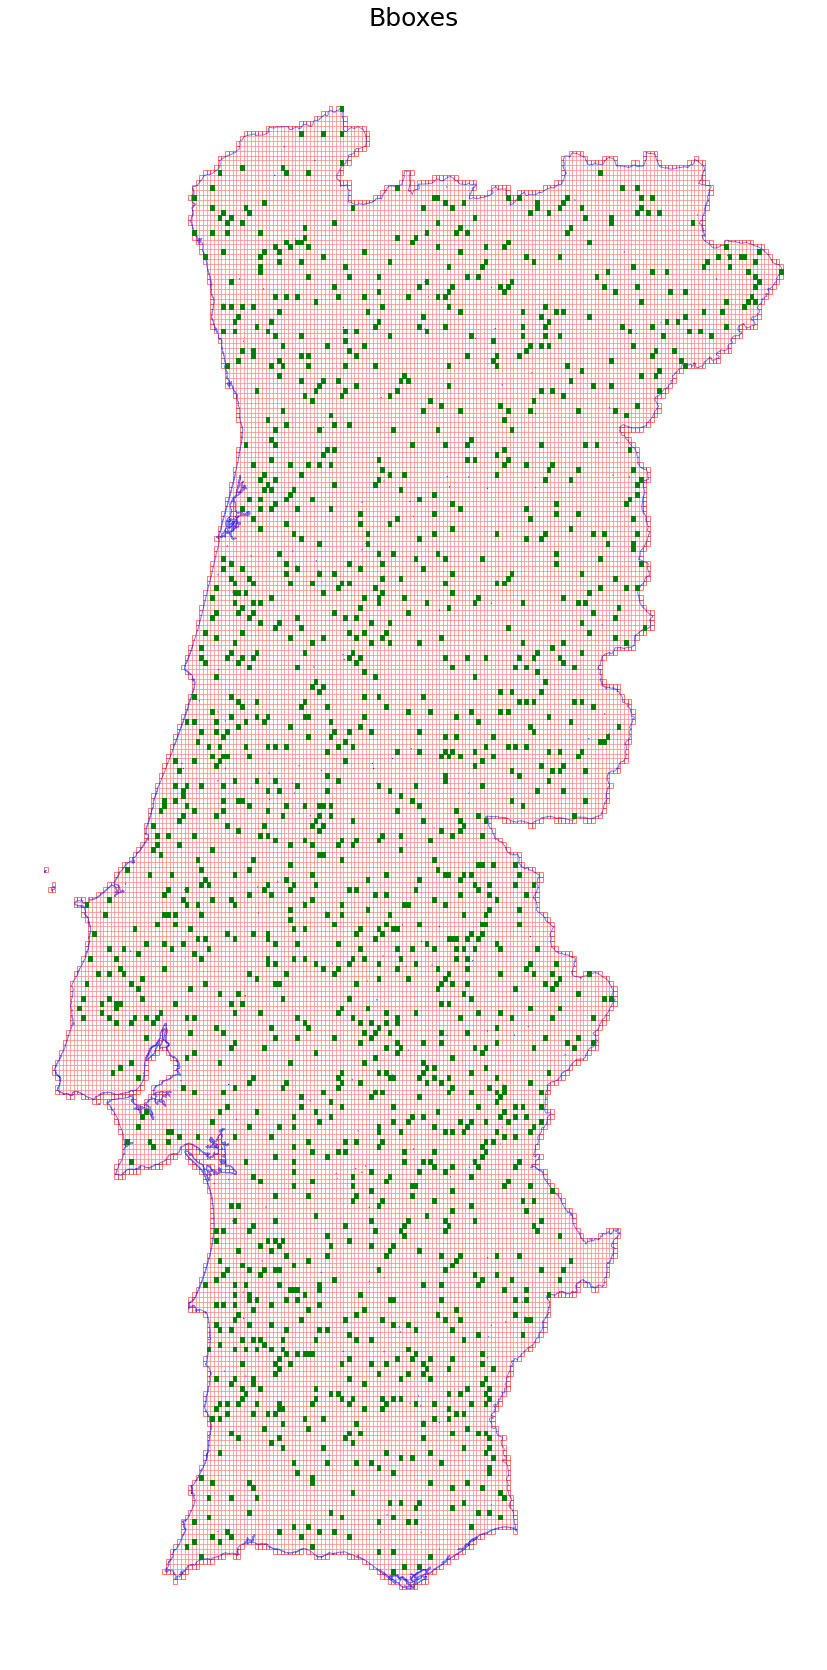

In [433]:
bbox_list = np.array(bbox_splitter.get_bbox_list())
info_list = np.array(bbox_splitter.get_info_list())
geometry = [Polygon(bbox.get_polygon()) for bbox in bbox_list]
gdf_bbox = gpd.GeoDataFrame(crs=portugal_gdf.crs,
                           geometry=geometry)
fig, ax = plt.subplots(figsize=(30, 30))
gdf_bbox.plot(ax=ax,facecolor='w',edgecolor='r',alpha=0.5)
portugal_bounds.plot(ax=ax, facecolor='w',edgecolor='b',alpha=0.5)
portugal_gdf.plot(ax=ax, edgecolor='b')

bbox_with_data.plot(ax=ax, edgecolor='green', facecolor='green')
#gpd.overlay(gdf_bbox,portugal_gdf, how='intersection').plot(ax=ax, edgecolor='green',facecolor='green')
ax.set_title('Bboxes', fontsize=25)
bbox
#for bbox, info in zip(bbox_list, info_list):
#    geo = bbox.geometry
    #ax.text(geo.centroid.x, geo.centroid.y, info['index'], ha='center', va='center')

#gdf[gdf.index.isin(patchIDs)].plot(ax=ax,facecolor='g',edgecolor='r',alpha=0.5)

plt.axis('off');

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\geopandas\base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.
C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\geopandas\plotting

<AxesSubplot:>

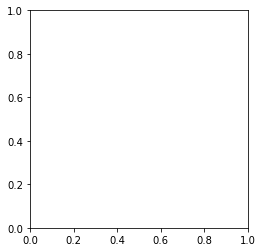

In [292]:
gdf_bbox[gdf_bbox.intersects(portugal_gdf)].plot()


In [ ]:
lst = []
for bbox in gdf_bbox.geometry:
    lst.append(np.where(portugal_gdf.geometry.intersects(bbox)==True))
#print(f'{portugal_gdf.crs}---{gdf_bbox.crs}')
lst

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

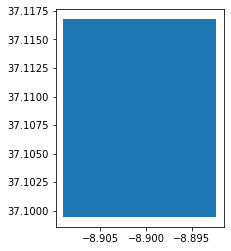

In [392]:
gdf_bbox.geometry[gdf_bbox.geometry.contains(portugal_gdf.geometry[0])].plot()

In [398]:
bbox_with_data = []
bbox_with_data = [gdf_bbox[gdf_bbox.geometry.contains(portugal_gdf.geometry[i])] for i,bxox in enumerate(portugal_gdf.geometry)]
bbox_with_data = np.concatenate(bbox_with_data).ravel()
bbox_with_data = gpd.GeoDataFrame(geometry=bbox_with_data[0])
bbox_with_data.crs = portugal_gdf.crs

In [419]:
bbox_with_data = np.concatenate(bbox_with_data).ravel()
bbox_with_data = gpd.GeoDataFrame(geometry=bbox_with_data[0])
bbox_with_data.crs = portugal_gdf.crs

C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\FEEL\anaconda3\envs\Geospatial\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich